In [4]:
 # Importing Tensorflow
import tensorflow as tf

In [3]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [7]:
# Importing the dataset and splitting into test and train data
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [8]:
# Since each image is mapped to a label. Storing labels for further processing
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [9]:
# EDA of the data
# Checking the sample sizes for train and test data
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [10]:
# Pre-processing the dataset
# Since the grayscale images are of the size (0, 255). We will scale it down to (0, 1)

def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster

train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

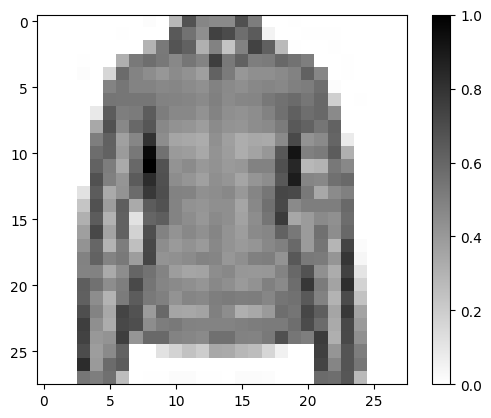

In [11]:
# Exploring the pre-processed data

# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

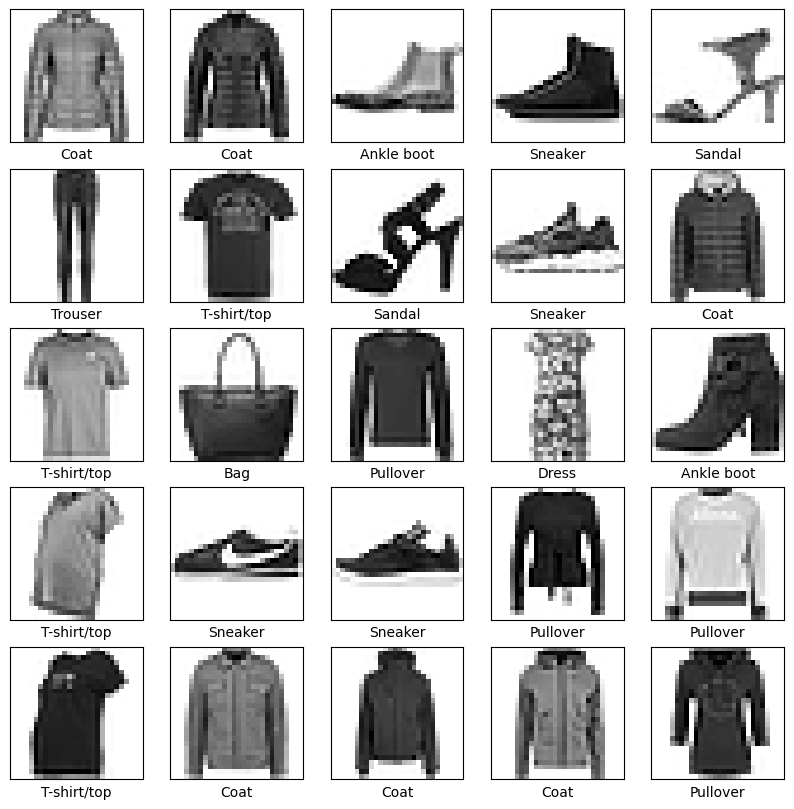

In [12]:
# Displaying first 25 images from the training dataset and displaying their label below it

plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [13]:
# Building the CNN Model

model = tf.keras.Sequential([
    # Convolution Layer i.e. Creating a 3X3 filter
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    # Max- Pooling Layer i.e Creating a 2X2 Pool size with 2 strides
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    # Convoluted Image Layer
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),

    # Max Pooling Layer
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    # Converting the 2D Image to Vector
    tf.keras.layers.Flatten(),

    # Hidden Layer
    tf.keras.layers.Dense(128, activation=tf.nn.relu),

    # Output Layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [14]:
# Compiling the Model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
# Training the model

BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [16]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 148s 74ms/step - loss: 0.3964 - accuracy: 0.8574
Epoch 2/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.2550 - accuracy: 0.9074
Epoch 3/10
1875/1875 [==============================] - 111s 59ms/step - loss: 0.2139 - accuracy: 0.9217
Epoch 4/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.1774 - accuracy: 0.9356
Epoch 5/10
1875/1875 [==============================] - 98s 52ms/step - loss: 0.1516 - accuracy: 0.9442
Epoch 6/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.1298 - accuracy: 0.9517
Epoch 7/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.1077 - accuracy: 0.9605
Epoch 8/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0921 - accuracy: 0.9659
Epoch 9/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0766 - accuracy: 0.9721
Epoch 10/10
1875/1875 [==============================] - 93s 

In [17]:
# Checking Model Accuracy on Test Data
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 7s 21ms/step - loss: 0.3466 - accuracy: 0.9164
Accuracy on test dataset: 0.9164000153541565


In [18]:
# Making Predictions on some images

for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 125ms/step


In [19]:
# Checking the shape of predictions data

predictions.shape

(32, 10)

In [20]:
predictions[0]

array([1.4852032e-10, 2.0643673e-12, 6.8783620e-03, 1.1079924e-15,
       7.8147262e-01, 1.6755231e-12, 2.1164908e-01, 4.5235757e-16,
       3.6068052e-12, 1.0282288e-10], dtype=float32)

In [21]:
np.argmax(predictions[0])

4

In [22]:
test_labels[0]

4

In [23]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

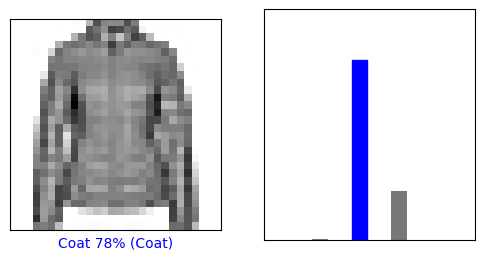

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

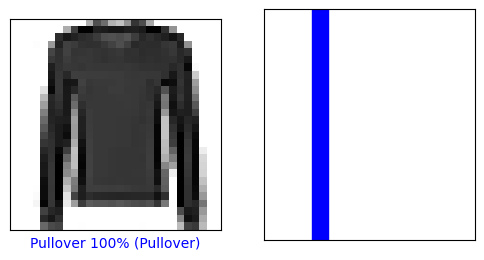

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

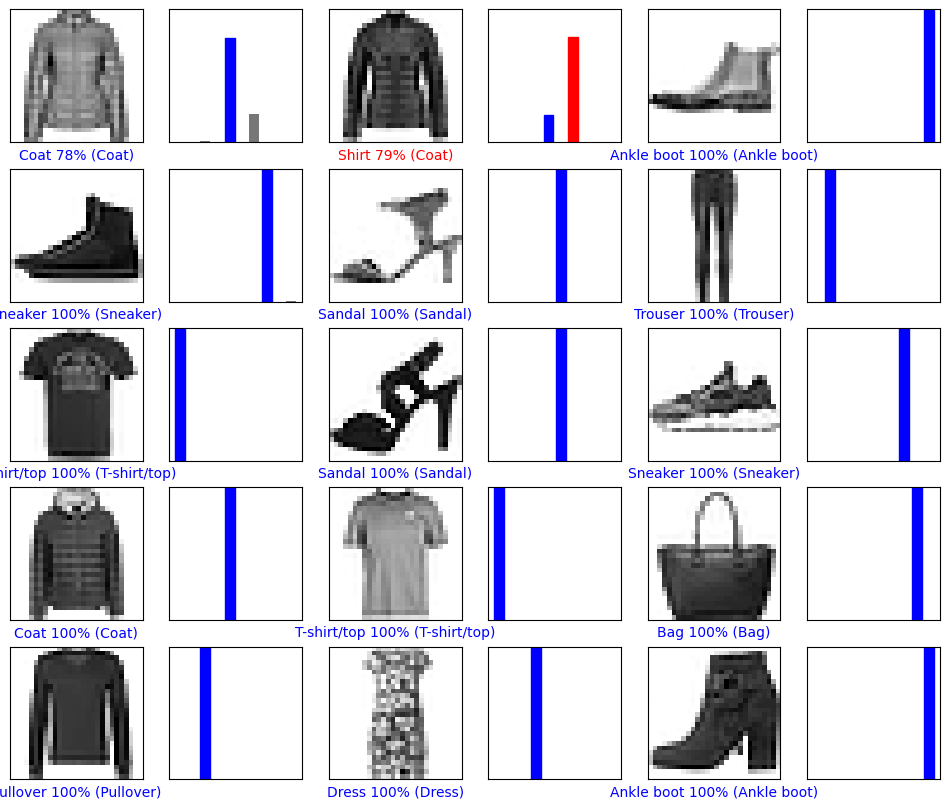

In [26]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [27]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [28]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [29]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 81ms/step
[[1.4852057e-10 2.0643628e-12 6.8783578e-03 1.1079922e-15 7.8147244e-01
  1.6755164e-12 2.1164921e-01 4.5235572e-16 3.6068045e-12 1.0282304e-10]]


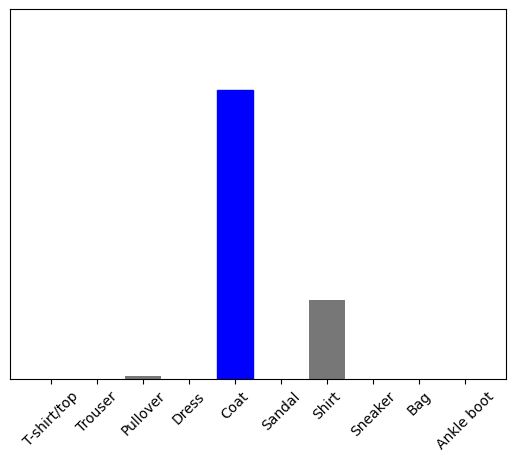

In [30]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
np.argmax(predictions_single[0])

4